In [17]:
from sklearn.datasets import load_iris
import pandas as pd

# Loading the Iris dataset
iris = load_iris()

# Converting to a DataFrame for easier exploration
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Species'] = iris.target  # Add the target column

# first few rows
print("First 5 rows of the dataset:")
print(iris_df.head())

# basic statistics
print("\nBasic statistics of the dataset:")
print(iris_df.describe())

# Checking for missing values
print("\nMissing values in the dataset:")
print(iris_df.isnull().sum())

# flower species in the dataset
print("\nFlower species in the dataset:")
print(iris.target_names)


First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  

Basic statistics of the dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.6000

In [18]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = iris.data  # Features (Sepal/Petal dimensions)
y = iris.target  # Target (Species)

# Spliting the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of training and test sets
print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")


Training set size: 120 samples
Test set size: 30 samples


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initializing the Random Forest model
model = RandomForestClassifier(random_state=42)

# Training the model using the training data
model.fit(X_train, y_train)

# predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


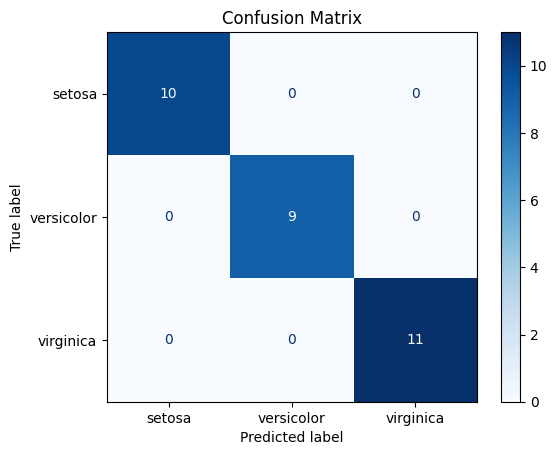

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [22]:
import joblib

# Saving the trained model
model_filename = "iris_model.joblib"
joblib.dump(model, model_filename)
print(f"Model saved as '{model_filename}'.")

# Load the saved model
loaded_model = joblib.load(model_filename)
print("Model loaded successfully.")

#Test the loaded model with sample data
sample_data = [X_test[0]]  # Use the first test sample for prediction
predicted_class = loaded_model.predict(sample_data)
print(f"Sample Data: {sample_data}")
print(f"Predicted Class: {iris.target_names[predicted_class[0]]}")


Model saved as 'iris_model.joblib'.
Model loaded successfully.
Sample Data: [array([6.1, 2.8, 4.7, 1.2])]
Predicted Class: versicolor
